# Reglas de asociaci√≥n

### Librer√≠as a utilizar:

- ggpubr
- arulesViz

### ¬øQu√© son las reglas de asociaci√≥n?

Las reglas de asociaci√≥n es una herramienta que goza de gran popularidad para la miner√≠a de datos en bases de datos, es una t√©cnica de aprendizaje **no supervisado**. La idea es encontrar valores conjuntos para una serie de caracter√≠sticas $X = (X_1, X_2, X_3, ..., X_p)$ , la meta es encontrar las m√°s frecuentes. Generalmente se utiliza en en datos con representaci√≥n binaria (1=est√° y 0= no est√°) $X_j \in \{0,1\}$, a esto se le suele llamar *market basket* (canasta de mercado), dado que el problema nace desde el problema de encontrar patrones en bases de datos comerciales. 



### ¬øCu√°ndo las utilizo?
- Cuando quiero encontrar un comportamiento repetitivo en base a la asociaci√≥n de las caracter√≠sticas del estudio.
- Descubrir un conjunto de hechos en com√∫n.
- Se quiere conocer relaciones entre las variables.

### Historia:

> Basado en el concepto de regla fuerte, Agrawal et al.3‚Äã presentaron un trabajo en el que indicaban las reglas de asociaci√≥n que descubr√≠an las relaciones entre los datos recopilados a gran escala en los sistemas de terminales de punto de venta de unos supermercados (Wikipedia).

Un ejemplo de regla ser√≠a:

$$ cebollas, vegetales => carne$$

Con este tipo de regla es posible conocer como se comporta el mercado, por ejemplo podr√≠a poner en pasillos cercanos los productos $carne, vegetales$ y $carne$.

### Conceptos very importantes

- Antecedente: Es la parte izquierda de la regla. Indica que relaciones provocan algo.
- Consecuente: Es la parte derecha. Indica la conclusi√≥n de la regla.
- Soporte: Es una medida de calidad de la regla. Para una regla $A => B$, el soporte es la fracci√≥n de observaciones en la uni√≥n del antecedente y consecuente.
$$ sop(X) = \frac{X}{D}$$
Donde $X$ corresponde a las transacciones y $D$ a la base de datos.

- Confianza: Corresponde a otra medida de inter√©s de la regla. Se define como el soporte de la regla dividodo por el soporte del antecedente.
$$ conf(A=>B) = \frac{sop(A => B)}{sop(A)}$$

** Algo as√≠ como la probabildiad condicional $P(B|A)$.


- *Lift*: expresa cu√°l es la proporci√≥n del soporte observado de un conjunto de productos respecto del soporte te√≥rico de ese conjunto dado el supuesto de independencia.

    - lift == 1 ? El conjunto aparece una cantidad de veces acorde a lo esperado bajo condiciones de independencia.
    - lift > 1 ? Ese conjunto aparece una cantidad de veces superior a lo esperado bajo condiciones de independencia (por lo que se puede intuir que existe una relaci√≥n que hace que los productos se encuentren en el conjunto m√°s veces de lo normal)
    - lift < 1 ? Ese conjunto aparece una cantidad de veces inferior a lo esperado bajo condiciones de independencia (por lo que se puede intuir que existe una relaci√≥n que hace que los productos no est√©n formando parte del mismo conjunto m√°s veces de lo normal)

$$ lift(A => B) = \frac{conf(A=>B)}{sop(B)}$$

** mide si la regla se debi√≥ al azar

> Cuanto m√°s se aleje el valor de lift de 1, m√°s evidencias de que la regla no se debe a un artefacto aleatorio, es decir, mayor la evidencia de que la regla representa un patr√≥n real ([Joaquin_AR](https://rpubs.com/Joaquin_AR/397172))

### Ejemplito textual:

- Se tiene un conjunto $K = \{mantequilla \quad de \quad man√≠, jalea, pan\}$
- Se tiene una regla *mantequilla de man√≠*, *jalea* => *pan*
- El soporte de la regla es de 0.03 -> esto significa que los elementos aparecen juntos un 3% en la canasta.
- La confianza de la regla es de 0.82 -> esto significa que el 82% del tiempo que la mantequilla de man√≠ y jalea fueron comprados, tambi√©n se compr√≥ pan.

- Si el pan apareci√≥ un 43% del total de canastas, entonces la regla tendr√≠a un *lift* de 1.95 ¬øqu√© significa esto?



In [1]:
library("ggpubr")
library("cowplot")

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‚Äòcowplot‚Äô

The following object is masked from ‚Äòpackage:ggpubr‚Äô:

    get_legend



### Ejemplo: 
Para el conjunto de datos de [semillas de trigo](https://archive.ics.uci.edu/ml/datasets/seeds) se quiere estudiar reglas de inter√©s que tengan como consecuente la clase.

Recordar que el conjunto de datos a explicar est√° completamente balanceado (misma cantidad de observaciones por clase) y se tienen 7 caracter√≠sticas continuas (todas positivas).

In [2]:
columns = c("area", "perimeter", "compactness", "length", "width", "AC", "lengthGroove", "class")
url = "https://www.dl.dropboxusercontent.com/s/wrexlo5im3g5ioi/seeds_dataset.csv"
seeds = read.csv(url, header = F, sep=",", col.names = columns)
seeds$class = factor(seeds$class, levels = c(1,2,3), labels = c("Kama", "Rosa", "Canadian"))

In [3]:
head(seeds)

area  perimeter compactness length width AC    lengthGroove class
1 15.26 14.84     0.8710      5.763  3.312 2.221 5.220        Kama 
2 14.88 14.57     0.8811      5.554  3.333 1.018 4.956        Kama 
3 14.29 14.09     0.9050      5.291  3.337 2.699 4.825        Kama 
4 13.84 13.94     0.8955      5.324  3.379 2.259 4.805        Kama 
5 16.14 14.99     0.9034      5.658  3.562 1.355 5.175        Kama 
6 14.38 14.21     0.8951      5.386  3.312 2.462 4.956        Kama

In [4]:
summary(seeds[seeds$class == "Kama",])

      area         perimeter      compactness         length     
 Min.   :11.23   Min.   :12.63   Min.   :0.8392   Min.   :4.902  
 1st Qu.:13.75   1st Qu.:13.96   1st Qu.:0.8689   1st Qu.:5.385  
 Median :14.36   Median :14.32   Median :0.8805   Median :5.534  
 Mean   :14.33   Mean   :14.29   Mean   :0.8801   Mean   :5.508  
 3rd Qu.:15.04   3rd Qu.:14.73   3rd Qu.:0.8904   3rd Qu.:5.677  
 Max.   :17.08   Max.   :15.46   Max.   :0.9183   Max.   :6.053  
     width             AC          lengthGroove        class   
 Min.   :2.850   Min.   :0.7651   Min.   :4.519   Kama    :70  
 1st Qu.:3.134   1st Qu.:1.8265   1st Qu.:4.925   Rosa    : 0  
 Median :3.244   Median :2.5455   Median :5.094   Canadian: 0  
 Mean   :3.245   Mean   :2.6674   Mean   :5.087                
 3rd Qu.:3.378   3rd Qu.:3.3010   3rd Qu.:5.223                
 Max.   :3.683   Max.   :6.6850   Max.   :5.877                

In [5]:
summary(seeds[seeds$class == "Rosa",])

      area         perimeter      compactness         length     
 Min.   :15.38   Min.   :14.66   Min.   :0.8452   Min.   :5.363  
 1st Qu.:17.33   1st Qu.:15.74   1st Qu.:0.8725   1st Qu.:5.979  
 Median :18.72   Median :16.21   Median :0.8826   Median :6.149  
 Mean   :18.33   Mean   :16.14   Mean   :0.8835   Mean   :6.148  
 3rd Qu.:19.14   3rd Qu.:16.56   3rd Qu.:0.8982   3rd Qu.:6.312  
 Max.   :21.18   Max.   :17.25   Max.   :0.9108   Max.   :6.675  
     width             AC         lengthGroove        class   
 Min.   :3.231   Min.   :1.472   Min.   :5.144   Kama    : 0  
 1st Qu.:3.554   1st Qu.:2.845   1st Qu.:5.878   Rosa    :70  
 Median :3.693   Median :3.610   Median :5.981   Canadian: 0  
 Mean   :3.677   Mean   :3.645   Mean   :6.021                
 3rd Qu.:3.805   3rd Qu.:4.436   3rd Qu.:6.188                
 Max.   :4.033   Max.   :6.682   Max.   :6.550                

In [6]:
summary(seeds[seeds$class == "Canadian",])

      area         perimeter      compactness         length     
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899  
 1st Qu.:11.26   1st Qu.:13.00   1st Qu.:0.8340   1st Qu.:5.136  
 Median :11.84   Median :13.25   Median :0.8494   Median :5.224  
 Mean   :11.87   Mean   :13.25   Mean   :0.8494   Mean   :5.230  
 3rd Qu.:12.43   3rd Qu.:13.47   3rd Qu.:0.8618   3rd Qu.:5.324  
 Max.   :13.37   Max.   :13.95   Max.   :0.8977   Max.   :5.541  
     width             AC         lengthGroove        class   
 Min.   :2.630   Min.   :1.661   Min.   :4.745   Kama    : 0  
 1st Qu.:2.725   1st Qu.:4.049   1st Qu.:5.002   Rosa    : 0  
 Median :2.834   Median :4.839   Median :5.091   Canadian:70  
 Mean   :2.854   Mean   :4.788   Mean   :5.116                
 3rd Qu.:2.967   3rd Qu.:5.467   3rd Qu.:5.229                
 Max.   :3.232   Max.   :8.456   Max.   :5.491                


Al igual que en las experiencias pasadas, para recordar c√≥mo se encuentran las clases en funci√≥n de sus caracter√≠sticas, se tiene que:

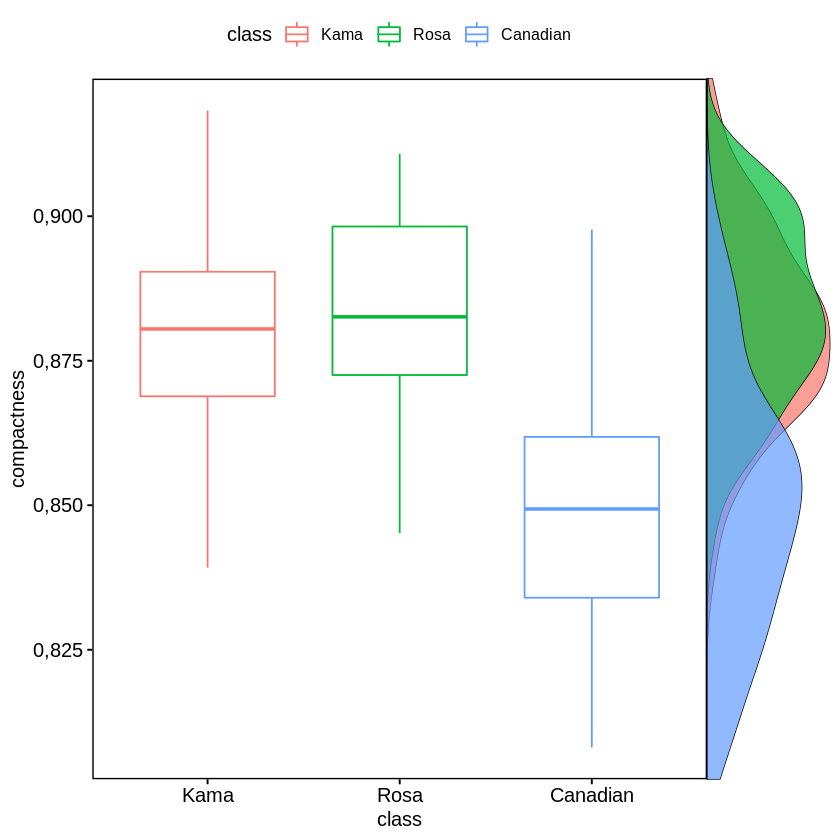

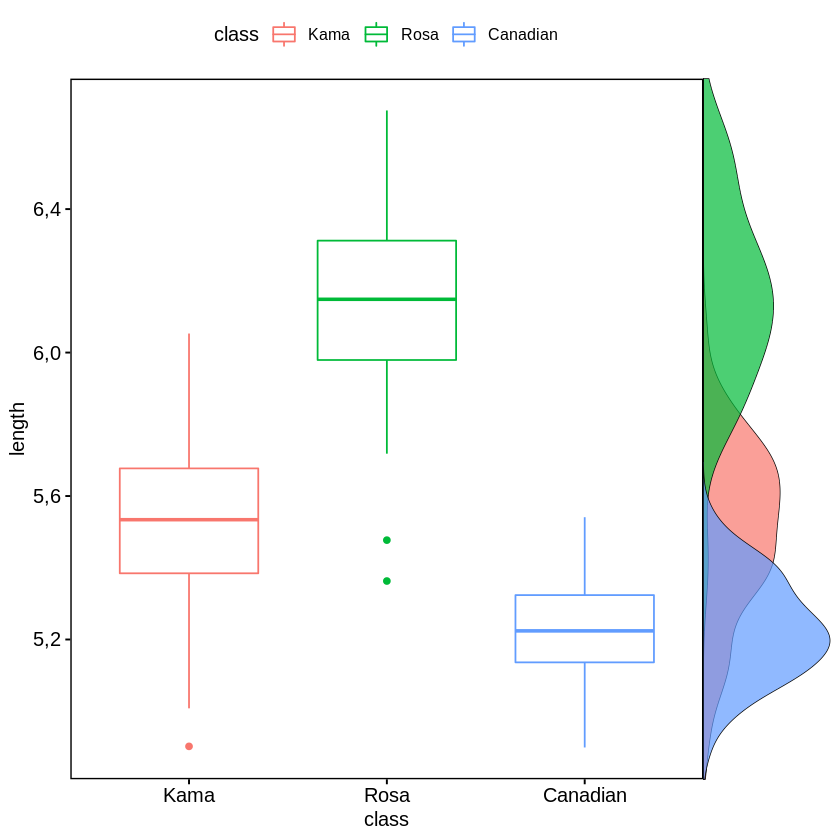

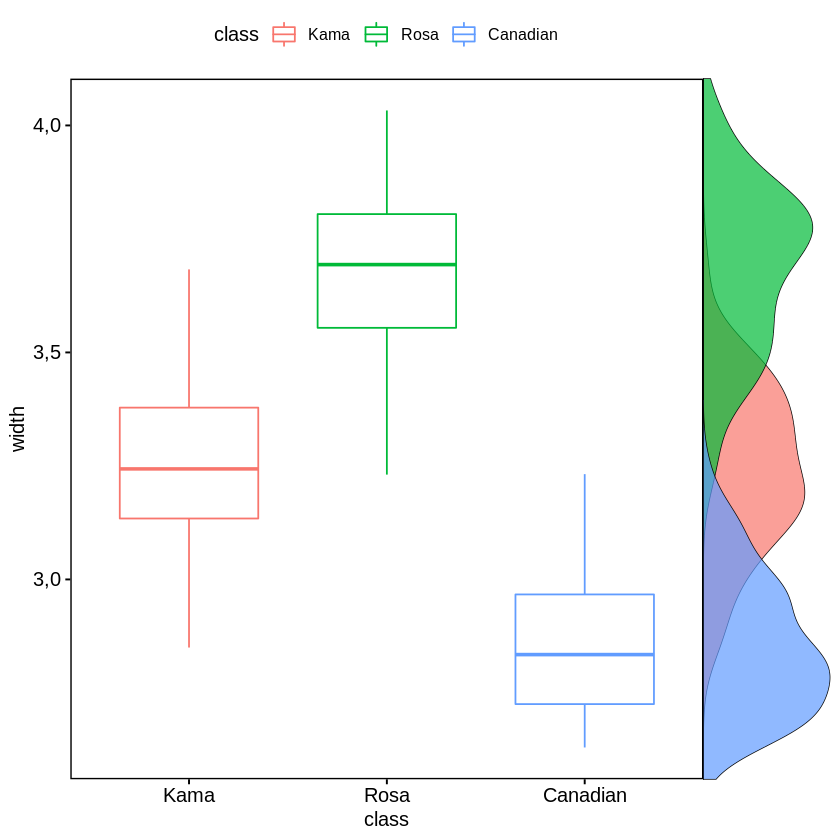

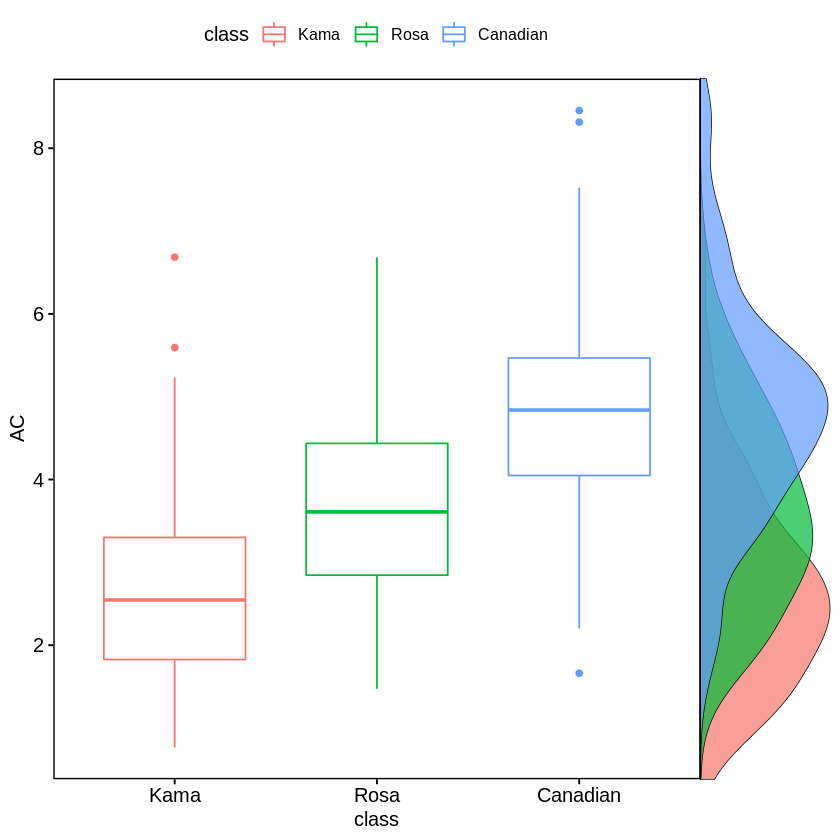

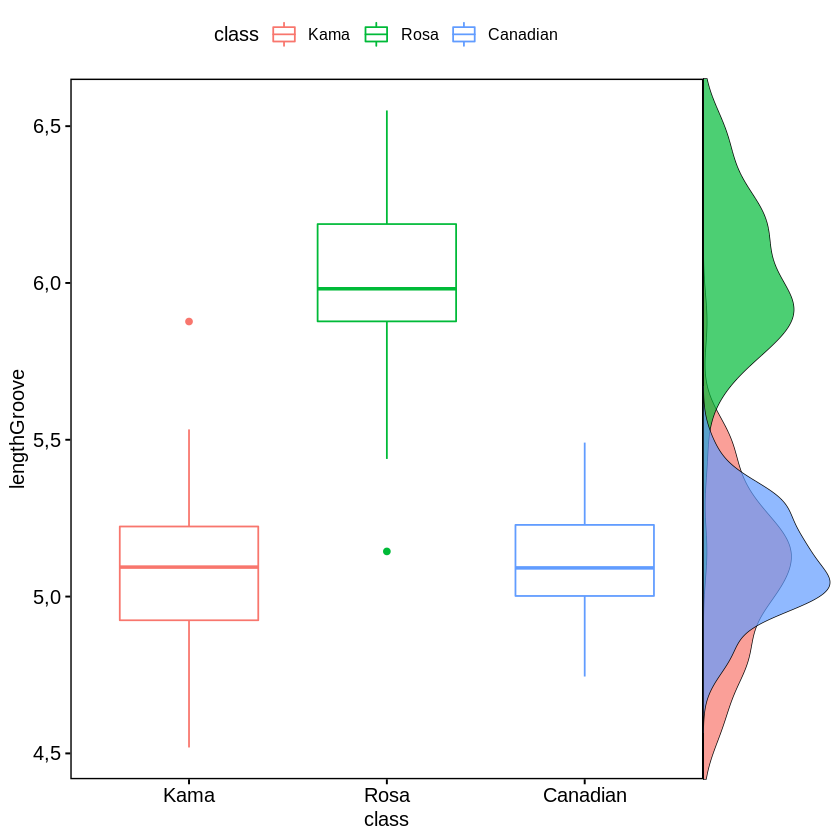

In [7]:
boxplot.area =  ggboxplot(data = seeds, x = "class", y = "area", color = "class", add = "jitter") + border() 
ydens = axis_canvas(boxplot.area, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = area, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.area = insert_yaxis_grob(boxplot.area, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.area)

# perimeter
boxplot.perimeter =  ggboxplot(data = seeds, x = "class", y = "perimeter", color = "class", add= "jitter") + border()
ydens = axis_canvas(boxplot.perimeter, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = perimeter, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.perimeter = insert_yaxis_grob(boxplot.perimeter, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.perimeter)

# compactness
boxplot.compactness =  ggboxplot(data = seeds, x = "class", y = "compactness", color = "class") + border()
ydens = axis_canvas(boxplot.compactness, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = compactness, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.compactness = insert_yaxis_grob(boxplot.compactness, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.compactness)

# length
boxplot.length =  ggboxplot(data = seeds, x = "class", y = "length", color = "class") + border()
ydens = axis_canvas(boxplot.length, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = length, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.length = insert_yaxis_grob(boxplot.length, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.length)

# width
boxplot.width =  ggboxplot(data = seeds, x = "class", y = "width", color = "class") + border()
ydens = axis_canvas(boxplot.width, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = width, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.width = insert_yaxis_grob(boxplot.width, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.width)

# AC
boxplot.AC =  ggboxplot(data = seeds, x = "class", y = "AC", color = "class") + border()
ydens = axis_canvas(boxplot.AC, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = AC, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.AC = insert_yaxis_grob(boxplot.AC, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.AC)

# lengthGroove
boxplot.lengthGroove =  ggboxplot(data = seeds, x = "class", y = "lengthGroove", color = "class") + border()
ydens = axis_canvas(boxplot.lengthGroove, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = lengthGroove, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.lengthGroove = insert_yaxis_grob(boxplot.lengthGroove, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.lengthGroove)

Se logra apreciar que algunas caracter√≠sticas como el √°rea y per√≠metro parecen ser un buen discriminador en sus respectivos gr√°ficos. Si vemos como se ve distribuida la clase en estas dos "dimensiones" existe una tendencia. ¬øA qu√© se parece esto? (spoiler: clustering)

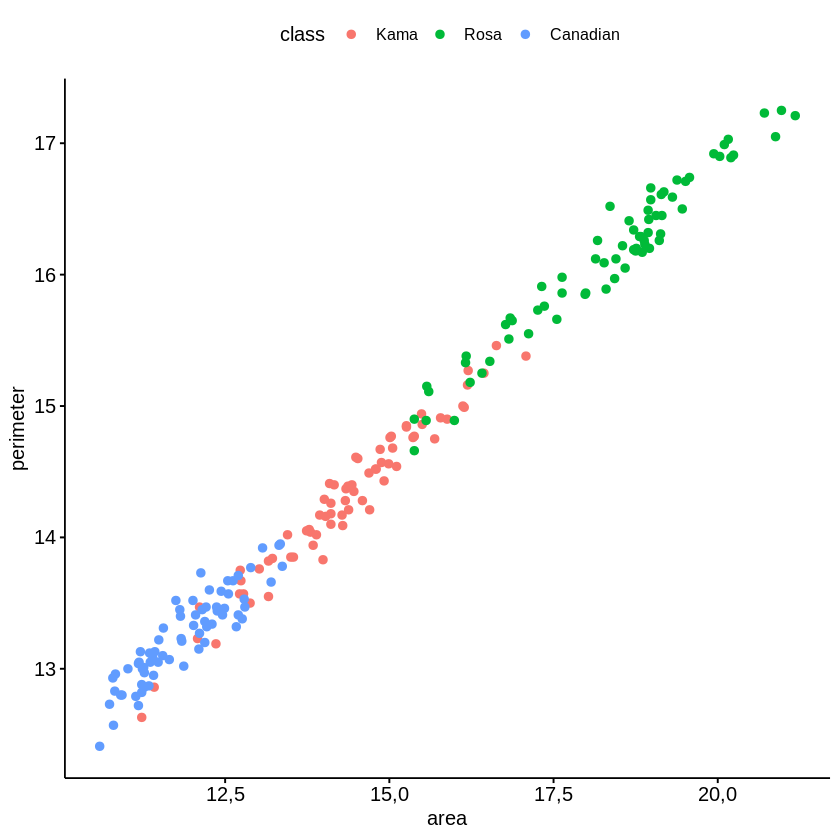

In [8]:
ggscatter(data = seeds, x = "area", y = "perimeter", color = "class")

## Reglas de asosciaci√≥n en R
Al observar el gr√°fico anterior podr√≠amos decir a **priori** que la clase Canadian tiene un √°rea peque√±a y per√≠mtro peque√±o.

Dejando de lado ese precario an√°lisis exploratorio (solo repaso), es hora de ver como se ven las reglas de asosiaci√≥n en R üò¨.

In [9]:
library("arulesViz")

Loading required package: arules
Loading required package: Matrix

Attaching package: ‚Äòarules‚Äô

The following objects are masked from ‚Äòpackage:base‚Äô:

    abbreviate, write

Loading required package: grid


Primero se debe discretizar los datos a trabajar (para esto deben ver la naturaleza de su problema), en este caso discretizaremos (arbitrariamente) en dos rangos por caracter√≠stica.

In [10]:
seeds.rules = seeds

area = c(-Inf, 14.85, Inf)
area.names = c("Peque√±a", "Grande")

perimeter = c(-Inf, 14.56, Inf)
perimeter.names = c("Peque√±a", "Grande")

compactness = c(-Inf, 0.8710, Inf)
compactness.names = c("Peque√±a", "Grande")

lenght = c(-Inf, 5.629, Inf)
lenght.names = c("Peque√±a", "Grande")

width = c(-Inf, 3.259, Inf)
width.names = c("Peque√±a", "Grande")

ac = c(-Inf, 3.7002, Inf)
ac.names = c("Peque√±a", "Grande")

lg = c(-Inf, 5.408, Inf)
lg.names = c("Peque√±a", "Grande")


seeds.rules$area = cut(seeds.rules$area, breaks = area, labels = area.names)
seeds.rules$perimeter = cut(seeds.rules$perimeter, breaks = perimeter, labels = perimeter.names)
seeds.rules$compactness = cut(seeds.rules$compactness, breaks = compactness, labels = compactness.names)
seeds.rules$length = cut(seeds.rules$length, breaks = lenght, labels = lenght.names)
seeds.rules$width = cut(seeds.rules$width, breaks = width, labels = width.names)
seeds.rules$AC = cut(seeds.rules$AC, breaks = ac, labels = ac.names)
seeds.rules$lengthGroove = cut(seeds.rules$lengthGroove, breaks = lg, labels = lg.names)

In [11]:
head(seeds.rules)

area    perimeter compactness length  width  AC      lengthGroove class
1 Grande  Grande    Peque√±a     Grande  Grande Peque√±a Peque√±a      Kama 
2 Grande  Grande    Grande      Peque√±a Grande Peque√±a Peque√±a      Kama 
3 Peque√±a Peque√±a   Grande      Peque√±a Grande Peque√±a Peque√±a      Kama 
4 Peque√±a Peque√±a   Grande      Peque√±a Grande Peque√±a Peque√±a      Kama 
5 Grande  Grande    Grande      Grande  Grande Peque√±a Peque√±a      Kama 
6 Peque√±a Peque√±a   Grande      Peque√±a Grande Peque√±a Peque√±a      Kama

Recordemos el gr√°fico de dispersi√≥n de [√°rea vs per√≠metro](#Reglas-de-asosciaci√≥n-en-R), en donde la premisa era que la clase Canadian ten√≠an un √°rea peque√±a y per√≠metro peque√±o. Busquemos este antecedente en el conjunto de datos...

In [12]:
seeds.rules[seeds.rules$area == "Peque√±a" &
            seeds.rules$perimeter == "Peque√±a",]

area    perimeter compactness length  width   AC      lengthGroove class   
3   Peque√±a Peque√±a   Grande      Peque√±a Grande  Peque√±a Peque√±a      Kama    
4   Peque√±a Peque√±a   Grande      Peque√±a Grande  Peque√±a Peque√±a      Kama    
6   Peque√±a Peque√±a   Grande      Peque√±a Grande  Peque√±a Peque√±a      Kama    
7   Peque√±a Peque√±a   Grande      Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
8   Peque√±a Peque√±a   Grande      Peque√±a Grande  Peque√±a Peque√±a      Kama    
12  Peque√±a Peque√±a   Grande      Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
13  Peque√±a Peque√±a   Grande      Peque√±a Peque√±a Grande  Peque√±a      Kama    
14  Peque√±a Peque√±a   Grande      Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
15  Peque√±a Peque√±a   Grande      Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
16  Peque√±a Peque√±a   Grande      Peque√±a Grande  Grande  Peque√±a      Kama    
17  Peque√±a Peque√±a   Grande      Peque√±a Grande  Grande  Peque√±a      Kama    
19  Peque√±a Peque√±a   Grande      Peque√±a Grande  Peque√±a Peque√±a      Kama    
20  Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Kama    
21  Peque√±a Peque√±a   Peque√±a     Grande  Peque√±a Peque√±a Peque√±a      Kama    
22  Peque√±a Peque√±a   Grande      Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
24  Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
27  Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
28  Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
29  Peque√±a Peque√±a   Grande      Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
30  Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
31  Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
33  Peque√±a Peque√±a   Peque√±a     Grande  Peque√±a Grande  Peque√±a      Kama    
34  Peque√±a Peque√±a   Grande      Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
39  Peque√±a Peque√±a   Grande      Grande  Grande  Peque√±a Peque√±a      Kama    
40  Peque√±a Peque√±a   Grande      Peque√±a Grande  Grande  Peque√±a      Kama    
41  Peque√±a Peque√±a   Grande      Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
42  Peque√±a Peque√±a   Grande      Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
43  Peque√±a Peque√±a   Grande      Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
46  Peque√±a Peque√±a   Grande      Peque√±a Peque√±a Peque√±a Peque√±a      Kama    
49  Peque√±a Peque√±a   Grande      Peque√±a Grande  Peque√±a Peque√±a      Kama    
... ...     ...       ...         ...     ...     ...     ...          ...     
181 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Canadian
182 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Canadian
183 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Canadian
184 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Canadian
185 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Canadian
186 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Canadian
187 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Canadian
188 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Canadian
189 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Canadian
190 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Canadian
191 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Canadian
192 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Canadian
193 Peque√±a Peque√±a   Grande      Peque√±a Peque√±a Peque√±a Peque√±a      Canadian
194 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a      Canadian
195 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande  Peque√±a

Como se logra apreciar, esa premisa resultaba bien solo para el gr√°fico, pero en realidad para buscar instancias de tipo Canadian existen **reglas** m√°s complejas y necesitamos buscarlas. Para eso utilizamos el algoritmo **apriori**.

In [13]:
rules = apriori(
    data = seeds.rules, 
    parameter=list(support = 0.2, minlen = 2, maxlen = 6, target="rules")    
)


inspect(sort(x = rules, decreasing = TRUE, by = "confidence"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0,8    0,1    1 none FALSE            TRUE       5     0,2      2
 maxlen target  ext
      6  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0,1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 42 

set item appearances ...[0 item(s)] done [0,00s].
set transactions ...[17 item(s), 210 transaction(s)] done [0,00s].
sorting and recoding items ... [17 item(s)] done [0,00s].
creating transaction tree ... done [0,00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = seeds.rules, parameter = list(support = 0,2, minlen = 2, :
‚ÄúMining stopped (maxlen reached). Only patterns up to a length of 6 returned!‚Äù

 done [0,00s].
writing ... [1321 rule(s)] done [0,00s].
creating S4 object  ... done [0,00s].
       lhs                       rhs                      support confidence  coverage     lift count
[1]    {class=Canadian}       => {width=Peque√±a}        0,3333333  1,0000000 0,3333333 1,926606    70
[2]    {class=Canadian}       => {area=Peque√±a}         0,3333333  1,0000000 0,3333333 1,810345    70
[3]    {class=Canadian}       => {perimeter=Peque√±a}    0,3333333  1,0000000 0,3333333 1,794872    70
[4]    {class=Canadian}       => {length=Peque√±a}       0,3333333  1,0000000 0,3333333 1,779661    70
[5]    {class=Rosa}           => {perimeter=Grande}     0,3333333  1,0000000 0,3333333 2,258065    70
[6]    {class=Rosa}           => {area=Grande}          0,3333333  1,0000000 0,3333333 2,234043    70
[7]    {compactness=Peque√±a,                                                                         
        class=Canadian}       => {width=Peque√±a}        0,2857143  1,0000000 0,28571

## ¬øQu√© reglas nos interesan para nuestro conjunto de datos?

Primero hay que preguntarse si las reglas anteriores son de inter√©s para mi estudio.

¬øme sirve decir que *{compactness=Peque√±a ^ class=Canadian} => {width=Peque√±a}*?

Filtrarenos para los consecuentes que contemplen la clase...

In [14]:
rules = apriori(
    data = seeds.rules, 
    parameter=list(support = 0.2, minlen = 2, maxlen = 6, target="rules"),
    appearance=list(rhs = c("class=Canadian", "class=Kama", "class=Rosa"))
)

inspect(sort(x = rules, decreasing = TRUE, by = "confidence"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0,8    0,1    1 none FALSE            TRUE       5     0,2      2
 maxlen target  ext
      6  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0,1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 42 

set item appearances ...[3 item(s)] done [0,00s].
set transactions ...[17 item(s), 210 transaction(s)] done [0,00s].
sorting and recoding items ... [17 item(s)] done [0,00s].
creating transaction tree ... done [0,00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = seeds.rules, parameter = list(support = 0,2, minlen = 2, :
‚ÄúMining stopped (maxlen reached). Only patterns up to a length of 6 returned!‚Äù

 done [0,00s].
writing ... [126 rule(s)] done [0,00s].
creating S4 object  ... done [0,00s].
      lhs                       rhs                support confidence  coverage     lift count
[1]   {compactness=Peque√±a,                                                                   
       length=Peque√±a,                                                                        
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[2]   {compactness=Peque√±a,                                                                   
       length=Peque√±a,                                                                        
       width=Peque√±a,                                                                         
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[3]   {area=Peque√±a,                                                                          
       compactness=Peque√±a,                  

¬øQu√© nos dice esto?
Una serie de reglas para decir si una semilla es de tipo Canadian y nos entrega unas m√©tricas de calidad de las reglas, como:

- Support
- Lift
- Confidence
- Coverage

```R
      lhs                       rhs                support confidence  coverage     lift count
[1]   {compactness=Peque√±a,                                                                   
       length=Peque√±a,                                                                        
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[2]   {compactness=Peque√±a,                                                                   
       length=Peque√±a,                                                                        
       width=Peque√±a,                                                                         
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[3]   {area=Peque√±a,                                                                          
       compactness=Peque√±a,                                                                   
       length=Peque√±a,                                                                        
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[4]   {perimeter=Peque√±a,                                                                     
       compactness=Peque√±a,                                                                   
       length=Peque√±a,                                                                        
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[5]   {area=Peque√±a,                                                                          
       compactness=Peque√±a,                                                                   
       length=Peque√±a,                                                                        
       width=Peque√±a,                                                                         
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[6]   {perimeter=Peque√±a,                                                                     
       compactness=Peque√±a,                                                                   
       length=Peque√±a,                                                                        
       width=Peque√±a,                                                                         
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[7]   {area=Peque√±a,                                                                          
       perimeter=Peque√±a,                                                                     
       compactness=Peque√±a,                                                                   
       length=Peque√±a,                                                                        
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[8]   {compactness=Peque√±a,                                                                   
       length=Peque√±a,                                                                        
       AC=Grande,                                                                             
       lengthGroove=Peque√±a} => {class=Canadian} 0,2333333  0,9607843 0,2428571 2,882353    49
[9]   {compactness=Peque√±a,                                                                   
       length=Peque√±a,                                                                        
       width=Peque√±a,                                                                         
       AC=Grande,                                                                             
       lengthGroove=Peque√±a} => {class=Canadian} 0,2333333  0,9607843 0,2428571 2,882353    49
[10]  {area=Peque√±a,                                                                          
       compactness=Peque√±a,                                                                   
       length=Peque√±a,                                                                        
       AC=Grande,                                                                             
       lengthGroove=Peque√±a} => {class=Canadian} 0,2333333  0,9607843 0,2428571 2,882353    49


```

Busquemos una regla en el conjunto de datos:

In [15]:
seeds.rules[seeds.rules$area == "Peque√±a" &
            seeds.rules$compactness == "Peque√±a" &
            seeds.rules$length == "Peque√±a" &
            seeds.rules$AC == "Grande" &
            seeds.rules$lengthGroove == "Peque√±a",]

area    perimeter compactness length  width   AC     lengthGroove class   
20  Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Kama    
64  Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Kama    
141 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
143 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
144 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
145 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
146 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
148 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
150 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
151 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
152 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
153 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
155 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
156 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
158 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
159 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
160 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
162 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
163 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
164 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
165 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
167 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
169 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
171 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
172 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
173 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
174 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
175 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
176 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
177 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
178 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
179 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
181 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
182 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
183 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
184 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
185 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
186 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
187 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
188 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
189 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
190 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
191 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
192 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
194 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
195 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
201 Peque√±a Pe

In [16]:
seeds.rules[seeds.rules$compactness == "Peque√±a" &
            seeds.rules$length == "Peque√±a" &
            seeds.rules$AC == "Grande",]

area    perimeter compactness length  width   AC     lengthGroove class   
20  Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Kama    
64  Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Kama    
141 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
142 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Grande       Canadian
143 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
144 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
145 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
146 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
148 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
150 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
151 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
152 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
153 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
155 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
156 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
158 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
159 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
160 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
162 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
163 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
164 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
165 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
167 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
169 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
171 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
172 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
173 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
174 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
175 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
176 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
177 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
178 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
179 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
181 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
182 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
183 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
184 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
185 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
186 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
187 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
188 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
189 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
190 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
191 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
192 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
194 Peque√±a Peque√±a   Peque√±a     Peque√±a Peque√±a Grande Peque√±a      Canadian
195 Peque√±a Peq